# 3. CNN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint


import numpy as np
import pandas as pd

from sklearn import svm, metrics
from sklearn.model_selection import StratifiedKFold, cross_validate

Using TensorFlow backend.
/home/miguel/.pyenv/versions/3.6.5/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


## 2.1 Open the dataset

In [2]:
BASE_DIR = '..'
DATA_DIR = f'{BASE_DIR}/data'

In [3]:
sample_df = pd.read_csv(f'{DATA_DIR}/sample.csv')

In [4]:
sample_df.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0


In [5]:
y = sample_df.pop('target').astype(int).values
X = sample_df.values

## Fit a simple CNN

In [6]:
n_folds = 10

In [7]:
def prepare_data(X, y):
    X = X.reshape(-1, 28, 28, 1)
    y = to_categorical(y, num_classes=10)
    
    return X, y

In [8]:
def train_evaluate(model, X_train, y_train, X_test, y_test, epochs=10, batch_size=128):
    X_train, y_train = prepare_data(X_train, y_train)
    X_test, y_test = prepare_data(X_test, y_test)
    
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)

    return model.evaluate(X_test, y_test)

In [9]:
def load_model():
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
    model.add(Flatten())
    model.add(Dense(256, activation="relu"))
    model.add(Dense(10, activation="softmax"))
    
    optmin = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    model.compile(optmin, loss='binary_crossentropy', metrics=['accuracy'])
    model.summary()
    
    return model

In [10]:
kFold = StratifiedKFold(n_splits=n_folds)

In [11]:
scores = []

In [12]:
for i, (train, test) in enumerate(kFold.split(X, y)):
    print(f'Running fold {i}...')
    model = load_model()
    _, acc = train_evaluate(model, X[train], y[train], X[test], y[test])
    scores.append(acc)
    
scores = np.array(scores)

Running fold 0...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               803

Epoch 1/10
449/449 [==============================] - 1s - loss: 0.3122 - acc: 0.9000     
Epoch 2/10
449/449 [==============================] - 1s - loss: 0.2231 - acc: 0.9102     
Epoch 3/10
449/449 [==============================] - 1s - loss: 0.1650 - acc: 0.9336     
Epoch 4/10
449/449 [==============================] - 1s - loss: 0.1315 - acc: 0.9555     
Epoch 5/10
449/449 [==============================] - 1s - loss: 0.1044 - acc: 0.9606     
Epoch 6/10
449/449 [==============================] - 1s - loss: 0.0858 - acc: 0.9697     
Epoch 7/10
449/449 [==============================] - 1s - loss: 0.0611 - acc: 0.9795     
Epoch 8/10
449/449 [==============================] - 1s - loss: 0.0494 - acc: 0.9833     
Epoch 9/10
449/449 [==============================] - 1s - loss: 0.0361 - acc: 0.9878     
Epoch 10/10
32/51 [=================>............] - ETA: 0sRunning fold 4...
_________________________________________________________________
Layer (type)                 Output S

Epoch 1/10
452/452 [==============================] - 1s - loss: 0.3165 - acc: 0.9000     
Epoch 2/10
452/452 [==============================] - 1s - loss: 0.2518 - acc: 0.9031     
Epoch 3/10
452/452 [==============================] - 1s - loss: 0.1675 - acc: 0.9367     
Epoch 4/10
452/452 [==============================] - 1s - loss: 0.1375 - acc: 0.9440     
Epoch 5/10
452/452 [==============================] - 1s - loss: 0.0977 - acc: 0.9650     
Epoch 6/10
452/452 [==============================] - 1s - loss: 0.0692 - acc: 0.9752     
Epoch 7/10
452/452 [==============================] - 1s - loss: 0.0543 - acc: 0.9823     
Epoch 8/10
452/452 [==============================] - 1s - loss: 0.0409 - acc: 0.9865     
Epoch 9/10
452/452 [==============================] - 1s - loss: 0.0332 - acc: 0.9874     
Epoch 10/10
32/48 [===================>..........] - ETA: 0sRunning fold 8...
_________________________________________________________________
Layer (type)                 Output S

In [13]:
print(f"Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})")

Accuracy: 0.9817 (+/- 0.0095)


In [14]:
scores

array([0.99056604, 0.98113207, 0.98490567, 0.97450982, 0.99607842,
       0.98399998, 0.97500002, 0.98541665, 0.98541667, 0.95999997])

## Data Augmentation

In [10]:
def augment_fold(X, y, aug_factor=5):
    from keras.preprocessing.image import ImageDataGenerator
    
    image_generator = ImageDataGenerator(width_shift_range=0.1)
    
    image_generator.fit(X.reshape(-1, 28, 28, 1), augment=True)
    
    np_iter = image_generator.flow(X.reshape(-1, 28, 28, 1), y, batch_size=500)
    
    X_aug_lst = [X]
    y_aug_lst = [y]
    
    for i in range(aug_factor):
        X_temp, y_temp = np_iter.next()
        X_temp = X_temp.reshape(len(X_temp), -1)
        X_aug_lst.append(X_temp)
        y_aug_lst.append(y_temp)
        
    X_aug = np.vstack(X_aug_lst)
    y_aug = np.concatenate(y_aug_lst)
    
    assert X_aug.shape[0] == y_aug.shape[0], f"X_aug and y_aug shapes mismatch {X_aug.shape[0]} - {y_aug.shape[0]}"
    
    X_aug = np.vstack(X_aug_lst)
    y_aug = np.concatenate(y_aug_lst)
    
    return X_aug, y_aug

In [11]:
n_folds = 10

In [12]:
kFold = StratifiedKFold(n_splits=n_folds)

In [13]:
results = {}

In [14]:
X_a, y_a = augment_fold(X, y, aug_factor=4)

In [20]:
scores = []

for i, (train, test) in enumerate(kFold.split(X_a, y_a)):
    print(f'Running fold {i}...')
    model = load_model()
    _, acc = train_evaluate(model, X_a[train], y_a[train], X_a[test], y_a[test])
    scores.append(acc)
    
scores = np.array(scores)

Running fold 0...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 256)               803

Epoch 1/10
2247/2247 [==============================] - 7s - loss: 0.2086 - acc: 0.9251     
Epoch 2/10
2247/2247 [==============================] - 7s - loss: 0.0703 - acc: 0.9762     
Epoch 3/10
2247/2247 [==============================] - 7s - loss: 0.0341 - acc: 0.9885     
Epoch 4/10
2247/2247 [==============================] - 8s - loss: 0.0167 - acc: 0.9944     
Epoch 5/10
2247/2247 [==============================] - 8s - loss: 0.0077 - acc: 0.9974     
Epoch 6/10
2247/2247 [==============================] - 8s - loss: 0.0034 - acc: 0.9995     
Epoch 7/10
2247/2247 [==============================] - 7s - loss: 0.0026 - acc: 0.9993     
Epoch 8/10
2247/2247 [==============================] - 7s - loss: 0.0017 - acc: 0.9994     
Epoch 9/10
2247/2247 [==============================] - 8s - loss: 0.0041 - acc: 0.9988     
Epoch 10/10
224/253 [=========================>....] - ETA: 0sRunning fold 4...
_________________________________________________________________
Layer (type)     

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_35 (Dense)             (None, 256)               803072    
__________

In [21]:
print(f"Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})")

Accuracy: 0.9984 (+/- 0.0010)


## Train

In [15]:
model = load_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               803072    
__________

In [16]:
earlystopper = EarlyStopping(
    patience=5,
    verbose=1,
    monitor="acc",
    mode='max'
)
checkpointer = ModelCheckpoint(
    'cnn_v1.h5',
    monitor="val_acc",
    verbose=1,
    mode='max',
    save_best_only=True
)
reduce_lr = ReduceLROnPlateau(monitor='val_acc', mode='max', factor=0.5, patience=5, min_lr=0.00001,
                          verbose=1)

In [17]:
X_a_reshaped, y_a_cat = prepare_data(X_a, y_a)

In [18]:
X_a_reshaped.shape

(2500, 28, 28, 1)

In [19]:
y_a_cat.shape

(2500, 10)

In [20]:
model.fit(X_a_reshaped, y_a_cat, epochs=20, batch_size=256, callbacks=[reduce_lr, earlystopper, checkpointer])

Epoch 1/20
2500/2500 [==============================] - 8s - loss: 0.2552 - acc: 0.9100     

/home/miguel/.ve/mnist-api-4asb866O/lib/python3.6/site-packages/keras/callbacks.py:889: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: loss,acc,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning
/home/miguel/.ve/mnist-api-4asb866O/lib/python3.6/site-packages/keras/callbacks.py:405: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)



Epoch 2/20
2500/2500 [==============================] - 8s - loss: 0.1137 - acc: 0.9594     
Epoch 3/20
2500/2500 [==============================] - 8s - loss: 0.0746 - acc: 0.9749     
Epoch 4/20
2500/2500 [==============================] - 8s - loss: 0.0476 - acc: 0.9851     
Epoch 5/20
2500/2500 [==============================] - 8s - loss: 0.0315 - acc: 0.9892     
Epoch 6/20
2500/2500 [==============================] - 7s - loss: 0.0189 - acc: 0.9936     
Epoch 7/20
2500/2500 [==============================] - 7s - loss: 0.0100 - acc: 0.9968     
Epoch 8/20
2500/2500 [==============================] - 8s - loss: 0.0051 - acc: 0.9989     
Epoch 9/20
2500/2500 [==============================] - 9s - loss: 0.0031 - acc: 0.9995     
Epoch 10/20
2500/2500 [==============================] - 7s - loss: 0.0015 - acc: 0.9998     
Epoch 11/20
2500/2500 [==============================] - 7s - loss: 8.8474e-04 - acc: 1.0000     
Epoch 12/20
2500/2500 [==============================] - 7s - l

In [21]:
model.save('../data/weights/cnn_v1.h5')

In [22]:
from keras.models import load_model as load
m = load('../data/weights/cnn_v1.h5')

In [23]:
X_a_reshaped[0].shape

(28, 28, 1)

In [24]:
m.predict_classes(X_a_reshaped[:1]).tolist()

1/1 [==============================] - 0s


[8]

In [25]:
image_b64 = ('AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA'
                     'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA'
                     'AAAAAAAAAAAAAAADEhISfoivGqb/938AAAAAAAAAAAAAAAAeJF6aqv39/f394az98sNAAAAAAAAAAAAAAAAx7v39/f39/f3'
                     '9+11SUjgnAAAAAAAAAAAAAAAAEtv9/f39/ca29/EAAAAAAAAAAAAAAAAAAAAAAABQnGv9/c0LACuaAAAAAAAAAAAAAAAAAA'
                     'AAAAAAAA4Bmv1aAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIv9vgIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAALvv1GAAAAA'
                     'AAAAAAAAAAAAAAAAAAAAAAAAAAAACPx4aBsAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAUfD9/XcZAAAAAAAAAAAAAAAAAAAA'
                     'AAAAAAAAAAAtuv39lhsAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBd/P27AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAPn9+UA'
                     'AAAAAAAAAAAAAAAAAAAAAAAAAAAAugrf9/c8CAAAAAAAAAAAAAAAAAAAAAAAAACeU5f39/fq2AAAAAAAAAAAAAAAAAAAAAA'
                     'AAGHLd/f39/clOAAAAAAAAAAAAAAAAAAAAAAAXQtX9/f39xlECAAAAAAAAAAAAAAAAAAAAABKr2/39/f3DUAkAAAAAAAAAA'
                     'AAAAAAAAAAAN6zi/f39/fSFCwAAAAAAAAAAAAAAAAAAAAAAAIj9/f3Uh4QQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA'
                     'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA'
                     'AAA==')

In [26]:
def _b64_to_image(image_b64):
    import base64
    r = base64.decodebytes(image_b64.encode())
    image = np.frombuffer(r, np.uint8)
    return image

In [27]:
s = _b64_to_image(image_b64)

In [28]:
m.predict_classes(s.reshape(-1, 28, 28, 1))

1/1 [==============================] - 0s


array([3])

In [29]:
s.shape

(784,)

In [30]:
s.reshape(28, 28).shape

(28, 28)

In [31]:
%matplotlib inline 

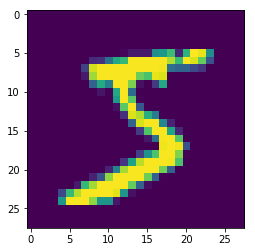

In [32]:
from matplotlib import pyplot as plt
plt.imshow(s.reshape(28, 28), interpolation='nearest')
plt.show()

In [ ]:
X_a_reshaped

In [ ]:
from keras.models import load_model as load
m = load('../data/weights/mlp_v1.h5')

In [ ]:
m.predict_classes(s.reshape(-1, 28 * 28)).tolist()[0]

In [ ]:
m.summary()